In [21]:
import pandas as pd
import seaborn as sns


data = pd.read_csv('CaseCompetitionData.csv', sep=',')
print(data.dtypes)
data.head()

insert_num                      int64
purchase_make                  object
purchase_model                 object
purchase_vehicle_year           int64
purchase_price                 object
trade_in                        int64
vehicle_financing               int64
customer_age                   object
customer_income                object
customer_gender                object
customer_previous_purchase      int64
customer_distance_to_dealer    object
post_purchase_satisfaction     object
vehicle_warranty_used           int64
subsequent_purchases            int64
dtype: object


,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2010,10001 - 15000,0,0,21 - 30,20001 - 40000,U,0,9,?,1,0
1,109994,FORD,EXPLORER SPORT TRAC,2007,15001 - 20000,0,1,61 - 70,20001 - 40000,M,1,15,?,0,0
2,11399,BMW,328,2010,20001 - 25000,1,1,31 - 40,80001 - 100000,F,1,18,?,0,9
3,360305,VOLVO,S40,2008,15001 - 20000,1,0,41 - 50,?,M,0,4,?,0,1
4,36685,CHEVROLET,CRUZE,2012,10001 - 15000,1,1,21 - 30,40001 - 60000,M,0,2,?,0,0


In [22]:
print(data.isna().sum()) # checks to see if there are any null records
print(data['subsequent_purchases'].unique()) # used this to check variable types in the rows => found '?'in 4
print(len(data)) # len of data set
# checking out missing data with conditionals
print(len(data.loc[(data['purchase_price'] !='?') & (data['customer_income'] != '?') & (data['customer_distance_to_dealer'] != '?')])) 
print(len(data.loc[data['post_purchase_satisfaction'] != '?'])) #satisfaction survey is a small group of non null


insert_num                     0
purchase_make                  0
purchase_model                 0
purchase_vehicle_year          0
purchase_price                 0
trade_in                       0
vehicle_financing              0
customer_age                   0
customer_income                0
customer_gender                0
customer_previous_purchase     0
customer_distance_to_dealer    0
post_purchase_satisfaction     0
vehicle_warranty_used          0
subsequent_purchases           0
dtype: int64
[ 0  9  1  2  4  3  7  8  5 10  6]
361559
307870
1219


   subsequent_purchases  insert_num
0                     0      238004
1                     1       98861
2                     2       10363
3                     3        3855
4                     4        3173
AxesSubplot(0.125,0.125;0.775x0.755)
   percent_total  subsequent_purchases
0      65.827154                     0
1      27.342979                     1
2       2.866199                     2
3       1.066216                     3
4       0.877588                     4
5       0.563394                     5
6       0.296494                     6
7       0.300919                     7
8       0.284877                     8
9       0.302302                     9


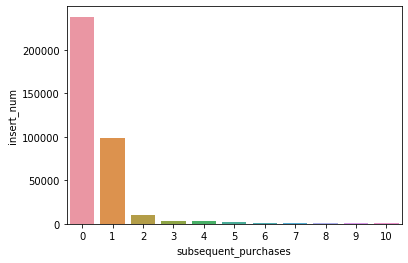

In [23]:
# reset index lets you create new data frame keeping the column names
sub_pur = data.groupby('subsequent_purchases')['insert_num'].count().to_frame().reset_index()  
print(sub_pur.head())
ax = sns.barplot(x='subsequent_purchases', y='insert_num', data=sub_pur) # seeing subsequent purchase distribution
print(ax)
total = len(data['insert_num'])
sub_pur['percent_total'] = sub_pur['insert_num']/total*100
print(sub_pur[['percent_total', 'subsequent_purchases']].head(10)) # looking at it in tabel format
# this also shows us that we are looking at a moderately unbalanced problem with roughly 34% being true positives

In [55]:
data['customer_previous_purchase'].mean()


0.21135692929784627

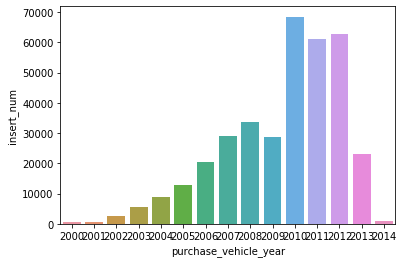

In [24]:
#sns.violinplot(x=data['purchase_vehicle_year']) # simple check of what year people are buying cars (remember its 2013)
year_parsed = data[data['purchase_vehicle_year'] >= 2000] # parsing to get a closer look at distribution
year_parsed = year_parsed.groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='insert_num', data=year_parsed)
#2010-2012 hold vast majority of purchases

0.3417284592556125


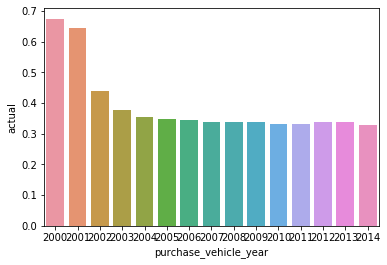

In [48]:
data['actual'] = 1
data.loc[data['subsequent_purchases'] == 0, 'actual'] = 0 # creating a label that will be used later in machine learning
subs = data.loc[data['purchase_vehicle_year'] >= 2000]
#sns.violinplot(x=subs['actual'], y=subs['purchase_vehicle_year']) # checking distribution of car year models against whether they are repeat customers
#looks like a rather similar distribution so this might not be entirely too telling

subs_ratio = data.loc[data['purchase_vehicle_year'] >= 2000].groupby('purchase_vehicle_year')['actual'].mean().to_frame().reset_index()
print(data['actual'].mean())
sns.barplot(x='purchase_vehicle_year', y='actual', data=subs_ratio)

,purchase_price,insert_num
0,0 - 5000,4425
1,10001 - 15000,101301
2,15001 - 20000,118303
3,20001 - 25000,66408
4,25001 - 30000,32352
5,30001 - 35000,15274
6,35001 - 40000,7276
7,40001 - 45000,3061
8,45001 - 50000,1577
9,50001 - 55000,681


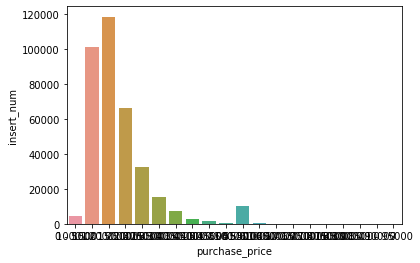

In [26]:
price_count = data.groupby('purchase_price')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_price', y='insert_num', data=price_count)
price_count
#most cars in 10,000 - 35,000 range, makes sense

0.3417284592556125


array(['0 - 5000', '10001 - 15000', '15001 - 20000', '20001 - 25000',
       '25001 - 30000', '30001 - 35000', '35001 - 40000', '40001 - 45000',
       '45001 - 50000', '50001 - 55000', '5001 - 10000', '55001 - 60000',
       '60001 - 65000', '65001 - 70000', '70001 - 75000', '75001 - 80000',
       '80001 - 85000', '85001 - 90000', '90001 - 95000', '?'],
      dtype=object)

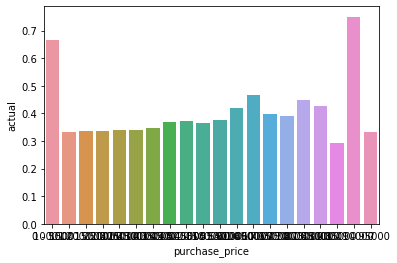

In [27]:
purch_ratio = data.groupby('purchase_price')['actual'].mean().to_frame().reset_index()
print(data['actual'].mean())
sns.barplot(x='purchase_price', y='actual', data=purch_ratio)
purch_ratio['purchase_price'].unique()

360405
  customer_age  actual
0       0 - 20    6343
1         101+    1311
2      21 - 30   84906
3      31 - 40   89749
4      41 - 50   85678
5      51 - 60   55469
6      61 - 70   26325
7      71 - 80    8217
8      81 - 90    2243
9     91 - 100     164


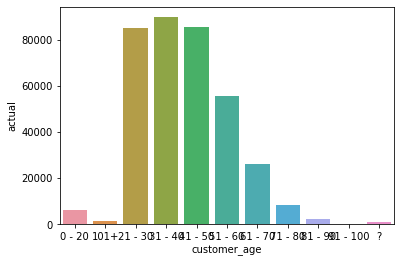

In [28]:
print(len(data[data['customer_age'] != '?'])) # only a couple people have unknown ages
age_counts = data.groupby('customer_age')['actual'].count().to_frame().reset_index()
print(age_counts.head(10))
sns.barplot(x='customer_age', y='actual', data=age_counts)

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases,actual
63,321071,TOYOTA,COROLLA,2002,0 - 5000,0,0,101+,40001 - 60000,M,0,3,?,0,3,1
606,142723,GMC,YUKON XL 1500,2009,35001 - 40000,0,1,101+,100001 - 120000,M,0,42,?,0,0,0
629,222272,LEXUS,RX 330,2005,10001 - 15000,0,0,101+,0 - 20000,F,0,6,?,0,1,1
717,219723,LEXUS,IS 250,2008,15001 - 20000,1,0,101+,?,F,0,15,?,1,0,0
751,287669,NISSAN,SENTRA,2011,10001 - 15000,1,1,101+,20001 - 40000,F,0,7,?,1,0,0
901,15559,BMW,535,2011,35001 - 40000,1,1,101+,?,U,1,?,?,1,1,1
1056,93762,DODGE,RAM 1500,2011,30001 - 35000,1,1,101+,80001 - 100000,M,0,64,?,0,1,1
1643,207712,KIA,OPTIMA,2013,15001 - 20000,0,0,101+,0 - 20000,F,0,6,?,0,1,1
1646,333673,TOYOTA,PRIUS,2011,20001 - 25000,1,0,101+,80001 - 100000,M,1,8,?,0,1,1
1701,280083,NISSAN,PATHFINDER,2013,40001 - 45000,1,1,101+,80001 - 100000,M,0,8,?,0,1,1


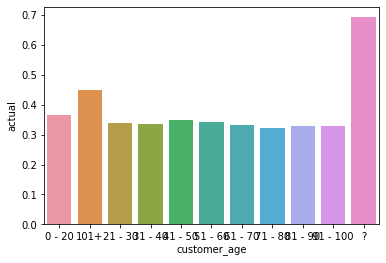

In [29]:
age_buckets = data.groupby('customer_age')['actual'].mean().to_frame().reset_index()
sns.barplot(x='customer_age', y='actual', data=age_buckets)
#interesting that 101+ stands out as a higher liklihood to be a repeat
age_buckets.head()
len(data['customer_age'])-len(data[data['customer_age'] != '?'])
#data[data['customer_age'] == '?'].head(25)

data[data['customer_age'] == '101+'].head(25)

,post_purchase_satisfaction,actual
0,0,12
1,1,1
2,10,819
3,3,5
4,4,6
5,5,12
6,6,13
7,7,34
8,8,94
9,9,223


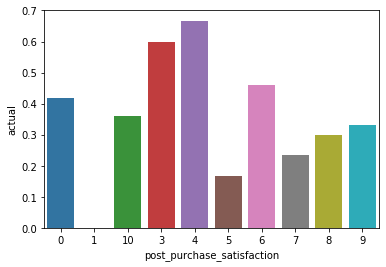

In [30]:
data_1 = data.loc[data['post_purchase_satisfaction'] != '?'].groupby('post_purchase_satisfaction')['actual'].count().to_frame().reset_index()

data_2 = data.loc[data['post_purchase_satisfaction'] != '?'].groupby('post_purchase_satisfaction')['actual'].mean().to_frame().reset_index()

sns.barplot(x='post_purchase_satisfaction', y='actual', data=data_2)
data_1.head(10)

In [31]:
trade_in = data.groupby('trade_in')['actual'].mean().to_frame().reset_index()
print(trade_in.head())
customer_previous_purchase = data.groupby('customer_previous_purchase')['actual'].mean().to_frame().reset_index()
print(customer_previous_purchase.head())

   trade_in    actual
0         0  0.322550
1         1  0.363858
   customer_previous_purchase    actual
0                           0  0.329577
1                           1  0.387068


,purchase_vehicle_year,insert_num
0,2000,466
1,2001,456
2,2002,1088
3,2003,2130
4,2004,3100
5,2005,4453
6,2006,7060
7,2007,9837
8,2008,11400
9,2009,9768


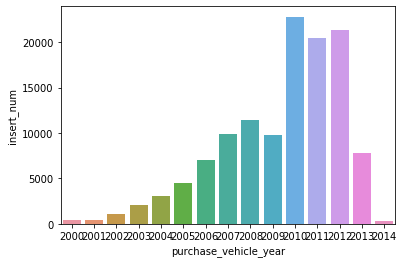

In [44]:
trade_in_yes = data.loc[(data['actual'] == 1) & (data['purchase_vehicle_year'] >= 2000)].groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
trade_in_no = data.loc[(data['actual'] == 0) & (data['purchase_vehicle_year'] >= 2000)].groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='insert_num', data=trade_in_yes)
trade_in_yes
# 

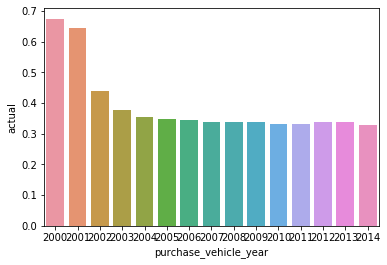

In [46]:
#sns.barplot(x='purchase_vehicle_year', y='insert_num', data=trade_in_no)
trade_in_ratio = data.loc[data['purchase_vehicle_year'] >= 2000].groupby('purchase_vehicle_year')['actual'].mean().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='actual', data=trade_in_ratio)

# while newer trade ins (2010 - 2012) make up the bulk of repeat customers (like most other categories) older cars have 
# the higher ratio of repeat buyers

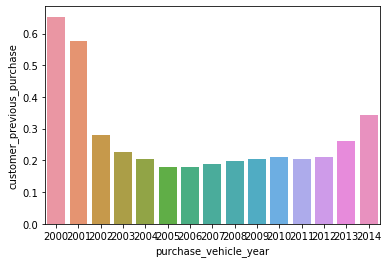

In [54]:
#cust_pp_yes = data.loc[data['actual'] == 1]
#cust_pp_no = data.loc[data['actual'] == 0]

cust_pp_year_ratio = data.loc[data['purchase_vehicle_year'] >= 2000].groupby('purchase_vehicle_year')['customer_previous_purchase'].mean().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year',y='customer_previous_purchase', data=cust_pp_year_ratio)

# customers 

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,actual,customer_distance_to_dealer
0,0,7.919407
1,1,7.864084


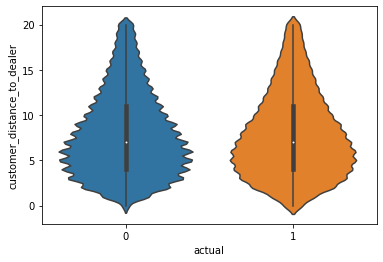

In [37]:
cust_dist = data[data['customer_distance_to_dealer'] != '?']
cust_dist['customer_distance_to_dealer'] = pd.to_numeric(cust_dist['customer_distance_to_dealer'])
cust_dist = cust_dist.loc[cust_dist['customer_distance_to_dealer'] <= 20]
sns.violinplot(x='actual', y='customer_distance_to_dealer', data=cust_dist)
print(cust_dist.groupby('actual')['customer_distance_to_dealer'].mean().to_frame().reset_index())


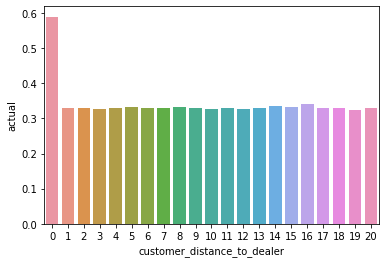

In [39]:
cust_dist_mean = cust_dist.groupby('customer_distance_to_dealer')['actual'].mean().to_frame().reset_index()
sns.barplot(x='customer_distance_to_dealer', y='actual', data=cust_dist_mean)
# really close people are likely to be repeat customers

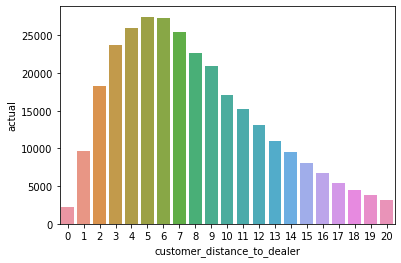

In [41]:
cust_dist_count = cust_dist.groupby('customer_distance_to_dealer')['actual'].count().to_frame().reset_index()
sns.barplot(x='customer_distance_to_dealer', y='actual', data=cust_dist_count)
# close people are likely to repeat but there aren't a ton of them, ***maybe do more promotions in community**